In [2]:
################################################ problem 1 ###################################################
import numpy as np
import matplotlib.pyplot as plt

def golden2D(x,dr,TOL):
    R,err,loop=0.61803399,10.,-1
    adr=np.sqrt(dr[0]**2+dr[1]**2)
    a= x-(dr/adr)
    b= x+(dr/adr)
    while(err > TOL):
        loop += 1
        x1= b-R*(b-a)
        x2= a+R*(b-a)
        f1=func(x1)
        f2=func(x2)
        if(f2>f1): b=x2
        else: a=x1
        err=sum((a-b)**2)
        err=np.sqrt(err)
    xmin=a
    return xmin,err,loop


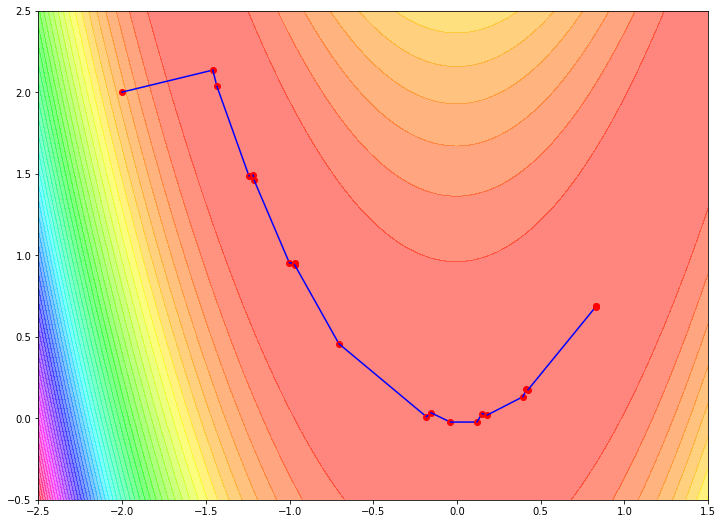

20 iterations


In [4]:
def func(x):
    return 100*(x[1]-x[0]**2)**2+(1-x[0])**2
def grad(x):
    return np.array([(-400)*x[0]*(x[1]-x[0]**2)-2*(1-x[0]),200*(x[1]-x[0]**2)])

plt.rcParams["figure.figsize"] = (12,9)
x=np.linspace(-2.5,1.5,400)
y=np.linspace(-0.5,2.5,400)
X, Y =np.meshgrid(x,y)
E=func([X,Y])
cmap=plt.cm.gist_heat
dmax=np.max(E)
dmin=np.min(E)
#levels=(dmax-dmin)*np.arange(20)/19.
con=plt.contourf(x, y, E, levels = np.linspace(dmin,dmax,50),cmap="hsv",alpha=0.5)

TOL=10**(-5)
x=np.array([-2,2])
d1=grad(x)
plt.plot(x[0],x[1],'ro')
x1,err,loop=golden2D(x,d1,TOL)
err=(x1[1]-x[1])**2+(x1[0]-x[0])**2
plt.plot([x[0],x1[0]],[x[1],x1[1]],'b')
plt.plot(x1[0],x1[1],'ro');x=x1

it= 0
while err>TOL:
    it+=1
    d2=grad(x)+((grad(x)[0]**2+grad(x)[1]**2)/(d1[0]**2+d1[1]**2))*d1
    x1,err,loop=golden2D(x,d2,TOL)
    d1=d2
    err=(x1[1]-x[1])**2+(x1[0]-x[0])**2
    plt.plot((x[0],x1[0]),[x[1],x1[1]],'b')
    plt.plot(x1[0],x1[1],'ro')
    x=x1
plt.show()
print('%d iterations'%it)

In [6]:
################################################ problem 2 ###################################################
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
def golden3D(x,dr,TOL):
    R,err,loop=0.61803399,10.,-1
    adr=np.sqrt(dr[0]**2+dr[1]**2+dr[2]**2)
    a= x-(dr/adr)
    b= x+(dr/adr)
    while(err > TOL):
        loop += 1
        x1= b-R*(b-a)
        x2= a+R*(b-a)
        f1=func(x1)
        f2=func(x2)
        if(f2>f1): b=x2
        else: a=x1
        err=sum((a-b)**2)
        err=np.sqrt(err)
    xmin=a
    return xmin,err,loop

In [7]:
def func(x):
    return 100*(x[1]-x[0]**2)**2+(1-x[0])**2+100*(x[2]-x[1]**2)**2+(1-x[2])**2
def grad(x):
    return np.array([(-400)*x[0]*(x[1]-x[0]**2)-2*(1-x[0]),
                     200*(x[1]-x[0]**2)-400*x[1]*(x[2]-x[1]**2),
                     200*(x[2]-x[1]**2)-2*(1-x[2])])
'''
plt.rcParams["figure.figsize"] = (12,9)
x=np.linspace(-2.5,1.5,400)
y=np.linspace(-0.5,2.5,400)
X, Y =np.meshgrid(x,y)
E=func([X,Y])
cmap=plt.cm.gist_heat
dmax=np.max(E)
dmin=np.min(E)
#levels=(dmax-dmin)*np.arange(20)/19.
con=plt.contourf(x, y, E, levels = np.linspace(dmin,dmax,50),cmap="hsv",alpha=0.5)
'''
TOL=10**(-12)
x=np.array([0,2,1])
d1=grad(x)
#plt.plot(x[0],x[1],'ro')
x1,err,loop=golden3D(x,d1,TOL)
err=(x1[2]-x[2])**2+(x1[1]-x[1])**2+(x1[0]-x[0])**2
#plt.plot([x[0],x1[0]],[x[1],x1[1]],'b')
#plt.plot(x2[0],x1[1],'ro');x=x1

it= 0
while err>TOL:
    it+=1
    d2=grad(x)+((grad(x)[0]**2+grad(x)[1]**2+grad(x)[2]**2)/(d1[0]**2+d1[1]**2+d1[2]**2))*d1
    x1,err,loop=golden3D(x,d2,TOL)
    d1=d2
    err=(x1[2]-x[2])**2+(x1[1]-x[1])**2+(x1[0]-x[0])**2
    print(x1)
        #print(func(x1))
    #plt.plot((x[0],x1[0]),[x[1],x1[1]],'b')
    #plt.plot(x1[0],x1[1],'ro')
    x=x1
#plt.show()
print('minimum point : ({},{},{})'.format(x[0],x[1],x[2]),'\n','%d iterations'%it)

[6.98430125e-04 1.02219782e+00 1.20952904e+00]
[0.00524699 0.74266856 1.1446439 ]
[0.03766059 0.28622472 0.25548229]
[ 0.07632552  0.03168293 -0.01596948]
[0.08967861 0.00210621 0.00691634]
[0.12904236 0.01957289 0.02701494]
[0.30569802 0.07009297 0.01756057]
[0.31558382 0.10200722 0.01359628]
[0.33574889 0.10580027 0.02687503]
[0.4518959  0.22032044 0.03518535]
[0.51280545 0.24771689 0.05641439]
[0.50714012 0.26169464 0.07142843]
[0.51432525 0.26266318 0.08116797]
[0.56576244 0.3294881  0.09785491]
[0.62200707 0.36989172 0.12962485]
[0.61390168 0.38142353 0.14351745]
[0.61765469 0.38076389 0.15400657]
[0.63932386 0.41894388 0.16947719]
[0.70268053 0.47794004 0.21759741]
[0.69302585 0.4856181  0.23396895]
[0.69580723 0.4839244  0.24118121]
[0.71850502 0.52136308 0.26160755]
[0.76286326 0.56461601 0.30929774]
[0.75324928 0.571211   0.32139325]
[0.75443172 0.56888882 0.32874921]
[0.76475029 0.59243802 0.34491642]
[0.81986012 0.65666016 0.41903597]
[0.80961836 0.65965793 0.43271004]
[0.81

95


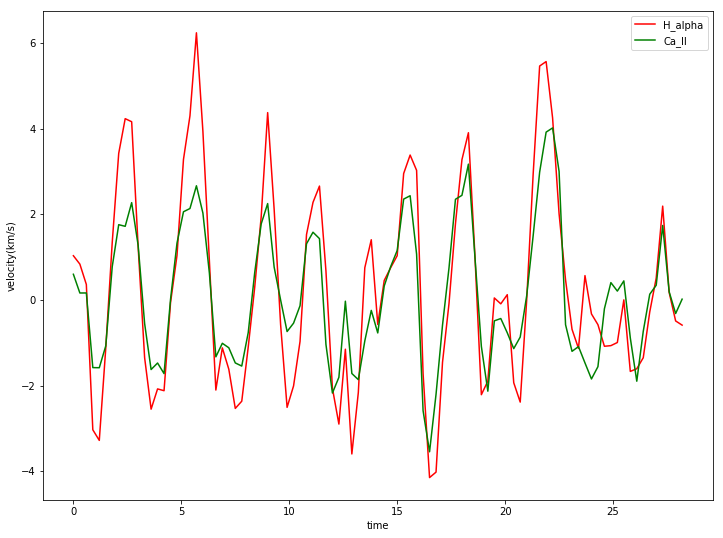

In [85]:
################################################ problem 3 ###################################################
fn = np.genfromtxt('sol_vel.dat.txt')
t,vH,vCa = fn[:,0], fn[:,1], fn[:,2]
#a)
plt.plot(t,vH,c = 'r',label = 'H_alpha')
plt.plot(t,vCa,c = 'g',label = 'Ca_II')
plt.ylabel('velocity(km/s)')
plt.xlabel('time')
plt.legend()

cos component : 0.248227 sin component : 0.319149


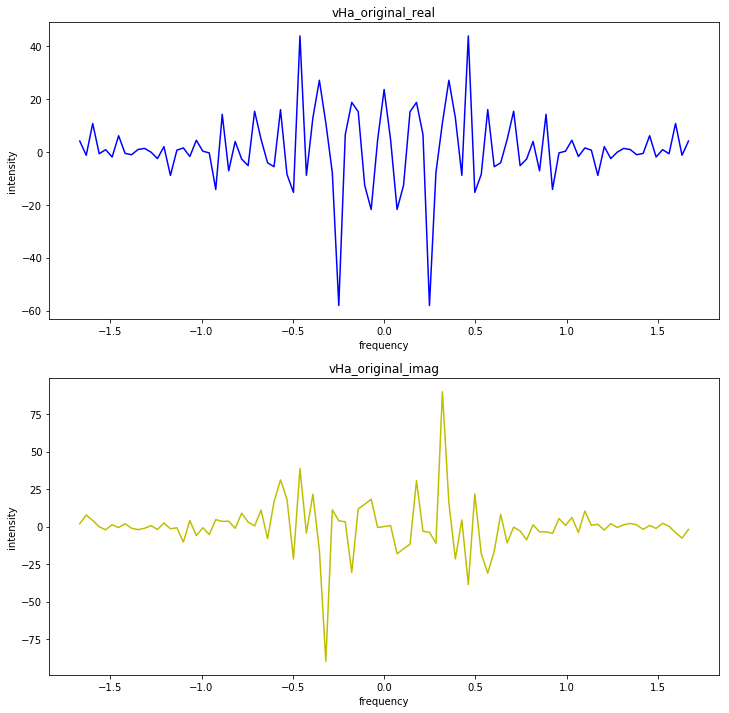

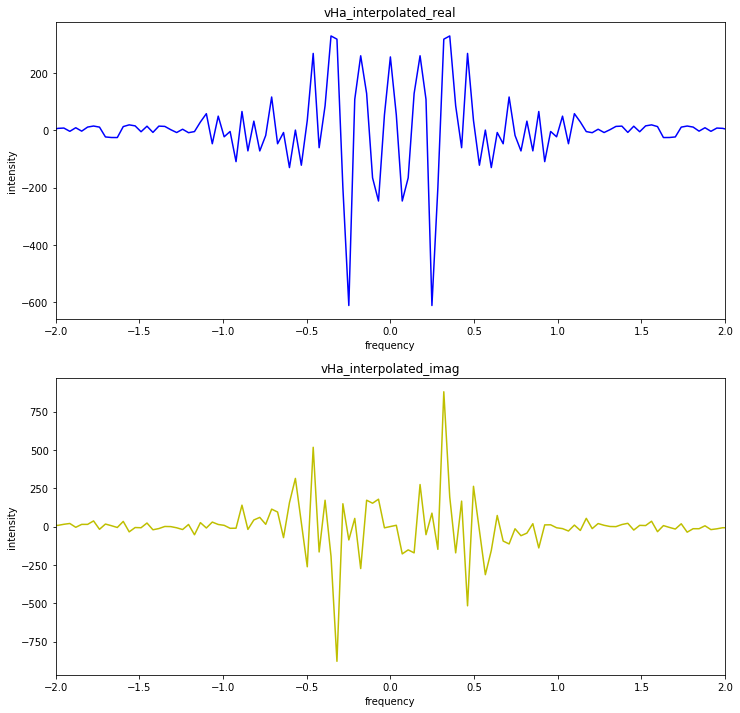

In [124]:
#b)
from scipy import interpolate
fn = np.genfromtxt('sol_vel.dat.txt')
t,vH,vCa = fn[:,0], fn[:,1], fn[:,2]

f1,f2 = vH,vCa

ff1 = interpolate.interp1d(t,f1)
T = np.arange(0,max(t),max(t)/1024)
fff1 = ff1(T)

#original
F1 = np.fft.fftshift(np.fft.fft(f1))
freq1 = np.fft.fftshift(np.fft.fftfreq(len(t),max(t)/len(t)))
F1_real,F1_imag = F1.real,F1.imag

plt.figure(1)
plt.rcParams["figure.figsize"] = (12,12)
plt.subplot(2,1,1)
plt.plot(freq1,F1_real, c = 'b');plt.title('vHa_original_real')
plt.xlabel('frequency');plt.ylabel('intensity')
plt.subplot(2,1,2)
plt.plot(freq1,F1_imag, c = 'y');plt.title('vHa_original_imag')
plt.xlabel('frequency');plt.ylabel('intensity')

#interpolated
FF1 = np.fft.fftshift(np.fft.fft(fff1))
ffreq1 = np.fft.fftshift(np.fft.fftfreq(1024,max(t)/1024))
FF1_real,FF1_imag = FF1.real,FF1.imag
plt.figure(2)
plt.rcParams["figure.figsize"] = (12,12)
plt.subplot(2,1,1)
plt.plot(ffreq1,FF1_real, c = 'b');plt.title('vHa_interpolated_real')
plt.xlabel('frequency');plt.ylabel('intensity')
plt.xlim(-2,2)
plt.subplot(2,1,2)
plt.plot(ffreq1,FF1_imag, c = 'y');plt.title('vHa_interpolated_imag')
plt.xlabel('frequency');plt.ylabel('intensity')
plt.xlim(-2,2)

#finding most dominant frequency
abs_real,abs_imag = (np.abs(F1_real)).tolist(),(np.abs(F1_imag)).tolist()
print('cos component : %.6f'%abs(freq1[abs_real.index(max(abs_real))])
     ,'sin component : %.6f'%abs(freq1[abs_imag.index(max(abs_imag))]))

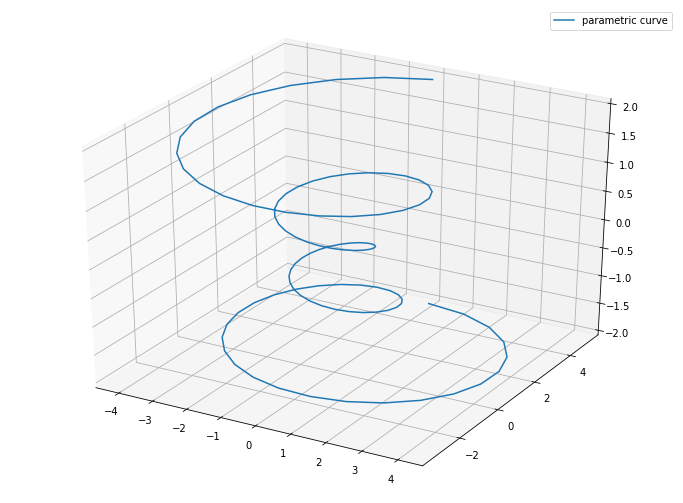

In [8]:
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt

mpl.rcParams['legend.fontsize'] = 10

fig = plt.figure()
ax = fig.gca(projection='3d')
theta = np.linspace(-4 * np.pi, 4 * np.pi, 100)
z = np.linspace(-2, 2, 100)
r = z**2 + 1
x = r * np.sin(theta)
y = r * np.cos(theta)
ax.plot(x, y, z, label='parametric curve')
ax.legend()

plt.show()
